In [2]:
import numpy as np
import pandas as pd

from collections import Counter, defaultdict
import re

from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from os import path
#from PIL import image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# from keras.models import Sequential
# from keras import layers

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/josephttustin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josephttustin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/josephttustin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
df=pd.read_csv("data/rotten_tomatoes_reviews.csv")
df_quick = df[:10000]
df_quick
y = df_quick.Freshness

In [4]:
count_vect = CountVectorizer(lowercase=True, tokenizer=None, strip_accents= "ascii", stop_words='english',
                             analyzer='word', max_df=1.0, min_df=2,
                             max_features=5000)
count_vect.fit(df_quick.Review.values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents='ascii', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [5]:
feature_names = count_vect.get_feature_names()
feature_names

['10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '1950s',
 '1974',
 '1980',
 '1980s',
 '1984',
 '1990s',
 '1998',
 '20',
 '2002',
 '2003',
 '2007',
 '2008',
 '2010',
 '2011',
 '2015',
 '21',
 '21st',
 '27',
 '30',
 '300',
 '3d',
 '40',
 '40s',
 '45',
 '47',
 '50',
 '50s',
 '60s',
 '70s',
 '80s',
 '90',
 '90s',
 '95',
 'aardman',
 'aaron',
 'abandon',
 'ability',
 'able',
 'abound',
 'abrahamson',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbing',
 'abstract',
 'absurd',
 'abundance',
 'abuse',
 'academy',
 'accent',
 'accents',
 'accept',
 'acceptance',
 'access',
 'accessible',
 'accident',
 'accompanied',
 'accomplished',
 'accomplishment',
 'account',
 'accurate',
 'ache',
 'achieve',
 'achieved',
 'achievement',
 'achieves',
 'achingly',
 'act',
 'acted',
 'acting',
 'action',
 'actioner',
 'actions',
 'actively',
 'activist',
 'activity',
 'actor',
 'actors',
 'actress',
 'actresses',
 'acts',
 'actual',
 'actually',
 'ad',
 'adam',
 'adams',
 'adaptation',
 'a

In [6]:
X_train_counts = count_vect.transform(df_quick["Review"].values)


In [21]:
X_train_counts_arr= X_train_counts.toarray()

In [9]:
tfidf_transformer = TfidfTransformer(use_idf=True)
tfidf_transformer.fit(X_train_counts)
X_train_tfidf = tfidf_transformer.transform(X_train_counts)
X_train_tfidf_arr = X_train_tfidf.toarray()

In [47]:
pca = PCA(n_components=3000) #pca object
X_pca = pca.fit_transform(X_train_tfidf_arr) # from 5000 features to 10 PCA features

print("\nData after PCA into 2 components")
print("PC1\tPC2")
for i in range(50):
    print("{0:0.1f}\t{1:0.1f}".format(X_pca[i,0], X_pca[i,1]))
X_pca.shape
pca.components_


Data after PCA into 2 components
PC1	PC2
0.0	-0.0
0.0	-0.0
-0.0	-0.0
-0.0	-0.0
-0.0	0.0
-0.0	-0.0
-0.0	-0.0
0.1	0.0
-0.0	-0.0
-0.0	-0.0
-0.0	-0.0
-0.0	-0.0
0.0	-0.0
-0.0	-0.0
0.0	-0.0
-0.0	-0.0
-0.1	0.0
0.0	-0.0
-0.2	0.1
0.0	-0.0
0.0	-0.0
0.0	-0.0
0.1	0.0
-0.0	-0.0
-0.1	0.0
0.0	-0.0
-0.0	-0.0
-0.0	-0.0
0.0	-0.0
0.1	0.0
0.0	-0.0
-0.0	-0.0
-0.1	0.0
-0.0	-0.0
-0.0	-0.0
-0.0	-0.0
-0.1	0.1
0.1	0.0
-0.0	-0.0
0.0	-0.0
-0.0	-0.0
0.0	-0.0
-0.1	0.0
-0.0	-0.0
-0.0	-0.0
-0.1	0.1
0.0	-0.0
-0.0	-0.0
-0.1	0.0
0.0	-0.0


array([[ 0.00137038,  0.00128196, -0.00113712, ...,  0.000543  ,
         0.01074129, -0.00210429],
       [-0.00258197, -0.00225382, -0.00244725, ..., -0.00107592,
         0.00497457,  0.00047925],
       [ 0.00075547,  0.00083872,  0.00076323, ..., -0.0012631 ,
         0.00307725,  0.00363436],
       ...,
       [-0.00473863, -0.02366109,  0.00934896, ..., -0.01153012,
        -0.0017475 , -0.04190341],
       [ 0.01403943, -0.00306582,  0.00149589, ...,  0.0208824 ,
        -0.00517875,  0.0201006 ],
       [ 0.00580924, -0.00210348, -0.00472552, ..., -0.00278286,
        -0.00125911,  0.03324278]])

(10000,)

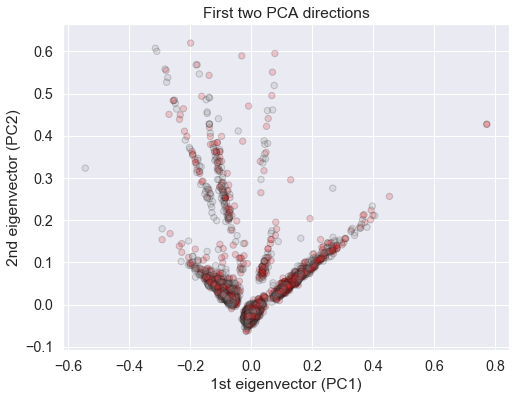

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40, alpha=0.2)
ax.set_title("First two PCA directions")
ax.set_xlabel("1st eigenvector (PC1)")
ax.set_ylabel("2nd eigenvector (PC2)");
X_pca[:,1].shape

In [49]:
evr = pca.explained_variance_ratio_
print(sum(evr))
print(evr)
top_pca_evr = np.argsort(evr)[::-1]
print(evr[top_pca_evr][:5])
total_variance = np.sum(pca.explained_variance_)
cum_variance_of_2 = np.sum(pca.explained_variance_[0:2])
prop_var_expl_2 = cum_variance_of_2/total_variance
print(prop_var_expl_2)
print("The 2 principal components explain {0:0.1f}%"
      " of the variance in the original data.".format(prop_var_expl_2*100))

0.9124105986110426
[4.38538042e-03 3.99726320e-03 3.60107333e-03 ... 7.39193897e-05
 7.37694768e-05 7.36494032e-05]
[0.00438538 0.00399726 0.00360107 0.00293345 0.00283125]
0.009187358885435037
The 2 principal components explain 0.9% of the variance in the original data.


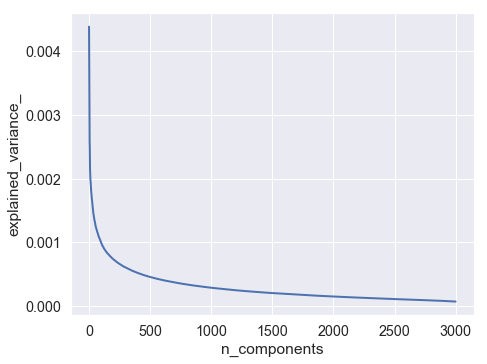

In [50]:
pca.fit(X_train_tfidf_arr)

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
num_components = pca.n_components_
ind = np.arange(num_components)
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_');

In [51]:
pca.explained_variance_ratio_

array([4.38538042e-03, 3.99726320e-03, 3.60107333e-03, ...,
       7.40625517e-05, 7.38966983e-05, 7.37882020e-05])

[0.0091877]


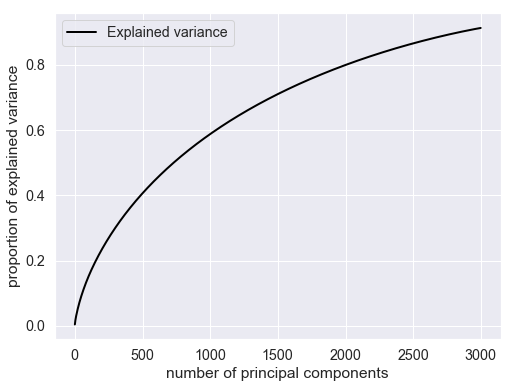

In [52]:
total_variance = np.sum(pca.explained_variance_)
cum_variance = np.cumsum(pca.explained_variance_)
prop_var_expl = cum_variance/total_variance
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(pca.explained_variance_ratio_.cumsum(), color = 'black', linewidth=2, label='Explained variance')
#ax.axhline(0.9, label='90% goal', linestyle='--', linewidth=1)
ax.set_ylabel('proportion of explained variance')
ax.set_xlabel('number of principal components')
ax.legend();
print(prop_var_expl[1:2])

In [53]:
def plot_rt_embedding(ax, X, y, title=None):
     """Plot an embedding of the tfidf word dataset onto a plane.
 
     Parameters
     ----------
     ax: matplotlib.axis object
       The axis to make the scree plot on.
 
     X: numpy.array, shape (n, 2)
       A two dimensional array containing the coordinates of the embedding.
 
     y: numpy.array
       The labels of the datapoints.  Should be digits.
 
     title: str
       A title for the plot.
     """
     x_min, x_max = np.min(X, 0), np.max(X, 0)
     X = (X - x_min) / (x_max - x_min)
     ax.axis('off')
     ax.patch.set_visible(False)
     for i in range(X.shape[0]):
         plt.text(X[i, 0], X[i, 1], 
                  str(y[i]), 
                  color=plt.cm.Set1(y[i]), 
                  fontdict={'weight': 'bold', 'size': 12})
 
     ax.set_xticks([]), 
     ax.set_yticks([])
     ax.set_ylim([-0.1,1.1])
     ax.set_xlim([-0.1,1.1])
 
     if title is not None:
         ax.set_title(title, fontsize=16)

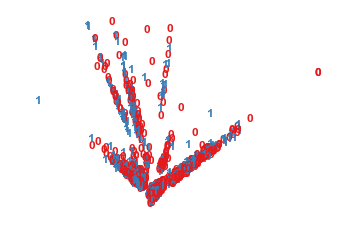

In [54]:
#X_pca = pca.fit_transform(X_train_counts_arr)
fig , ax = plt.subplots()
plot_rt_embedding(ax, X_pca, y, title=None)